In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt


# Bayesian Inference Example
We want to estimate the probability that a biased coin lands on *heads*. We'll use Bayesian inference to update our estimation as we collect more data

In [2]:
def plot_round(x, prior, likelihood, posterior):
    fs = 14
    fig, ax = plt.subplots(figsize=[15,5])
    plt.plot(theta_range, prior, linewidth=3, color='palegreen', label='Prior')
    plt.plot(theta_range, likelihood, linewidth=3, color='lightsalmon', label='Likelihood')
    plt.plot(theta_range, posterior, lw=3, color='skyblue', label='Posterior')
    plt.grid(alpha=.4, linestyle='--')
    plt.legend(fontsize=fs)
    plt.xlabel(r'Hidden probability, $\theta$', fontsize=fs)
    plt.ylabel('Probability', fontsize=fs)
    plt.show()
    plt.close()

In [3]:
def collect_data(num_samples: int, hidden_probability: float = 0.3) -> np.ndarray:
    return np.random.binomial(n=1, p=hidden_probability, size=num_samples)

In [4]:
def get_gaussian_dist(x, mean, stddev):
    dist = stats.norm.pdf(x=x, loc=mean, scale=stddev)
    return dist / np.sum(dist)

def get_binomial_dist(x, data):
    dist = stats.binom.pmf(k=np.sum(data), n=len(data), p=x)
    return dist / np.sum(dist)

Empirical probability: 0.27
Sum of prior dist: 0.9999999999999998
Sum of likelihood dist: 0.9999999999999998
Sum of posterior dist: 1.0000000000000002
New estimate, theta = 0.349


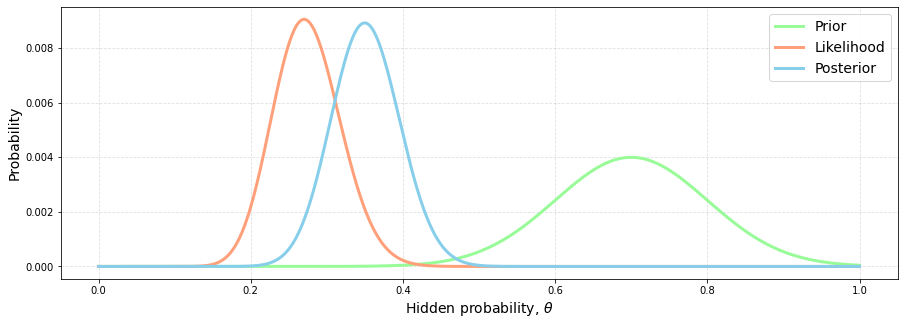

In [5]:
theta_range = np.linspace(0, 1, 1000)
mean = 0.7
stddev=0.1
data = collect_data(100)
print('Empirical probability:', np.sum(data)/len(data))

prior = get_gaussian_dist(theta_range, mean, stddev)
print('Sum of prior dist:', np.sum(prior))

likelihood = get_binomial_dist(theta_range, data)
print('Sum of likelihood dist:', np.sum(likelihood))

posterior = (likelihood * prior)
posterior = posterior / np.sum(posterior)
print('Sum of posterior dist:', np.sum(posterior))
new_theta = np.argmax(posterior) / len(posterior)
print(f'New estimate, theta = {new_theta}')

plot_round(theta_range, prior, likelihood, posterior)

Bayesian inference, round 0
	Empirical probability: 0.1
	New estimate, theta = 0.475


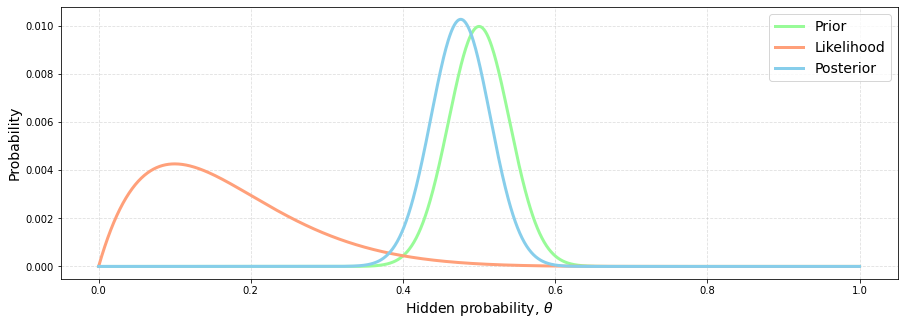


Bayesian inference, round 1
	Empirical probability: 0.2
	New estimate, theta = 0.443


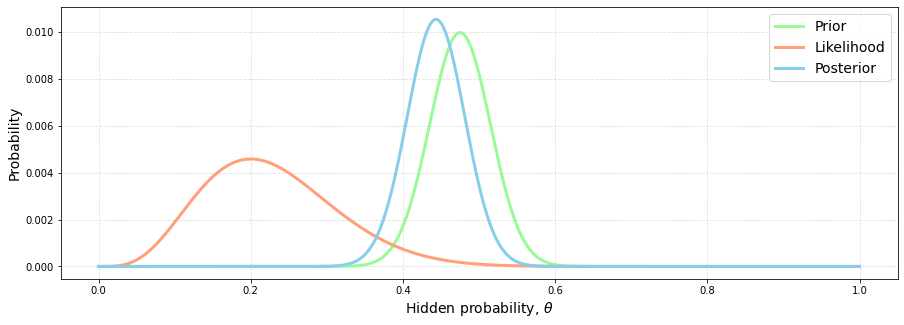


Bayesian inference, round 2
	Empirical probability: 0.26666666666666666
	New estimate, theta = 0.413


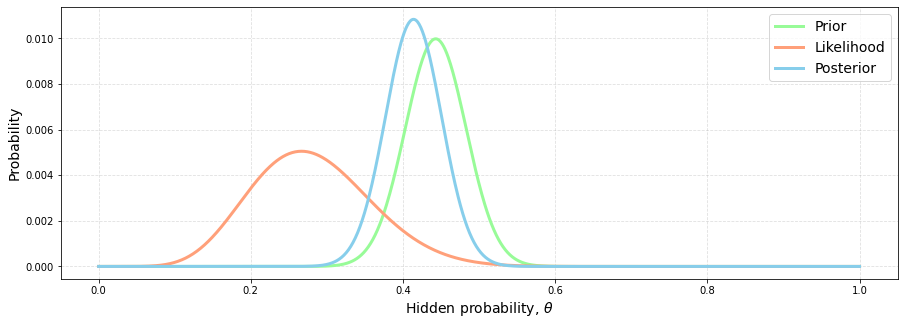


Bayesian inference, round 3
	Empirical probability: 0.225
	New estimate, theta = 0.372


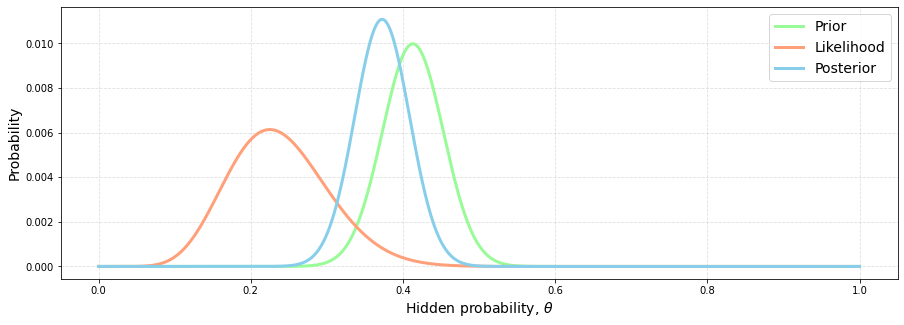


Bayesian inference, round 4
	Empirical probability: 0.22
	New estimate, theta = 0.331


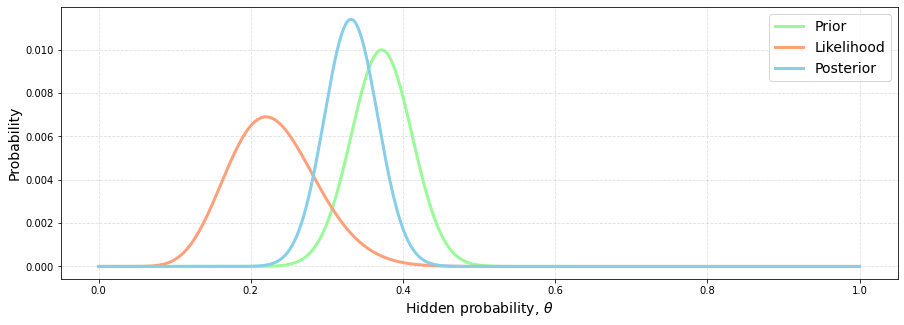


Bayesian inference, round 5
	Empirical probability: 0.18333333333333332
	New estimate, theta = 0.283


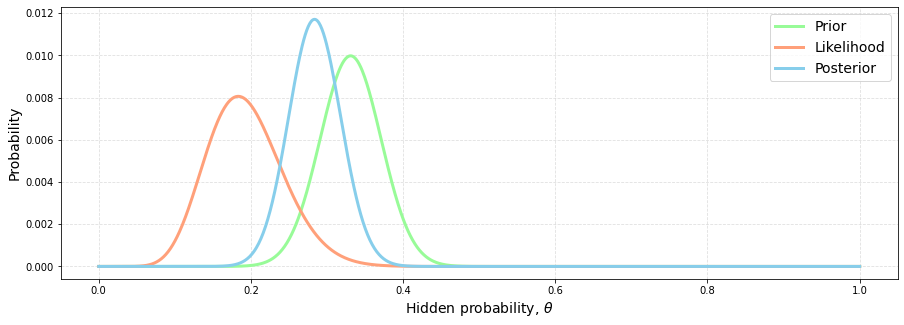


Bayesian inference, round 6
	Empirical probability: 0.18571428571428572
	New estimate, theta = 0.246


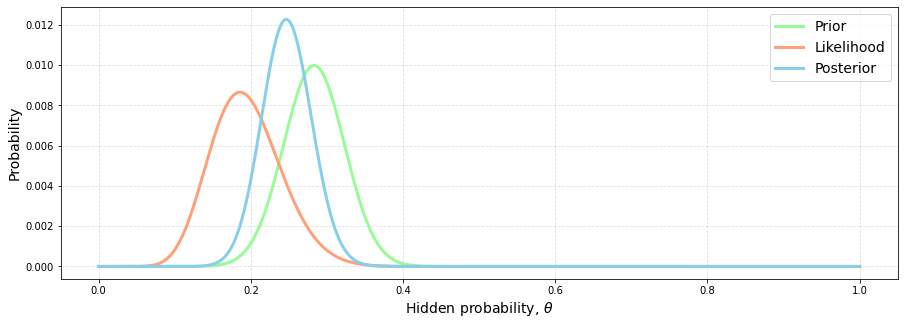


Bayesian inference, round 7
	Empirical probability: 0.175
	New estimate, theta = 0.215


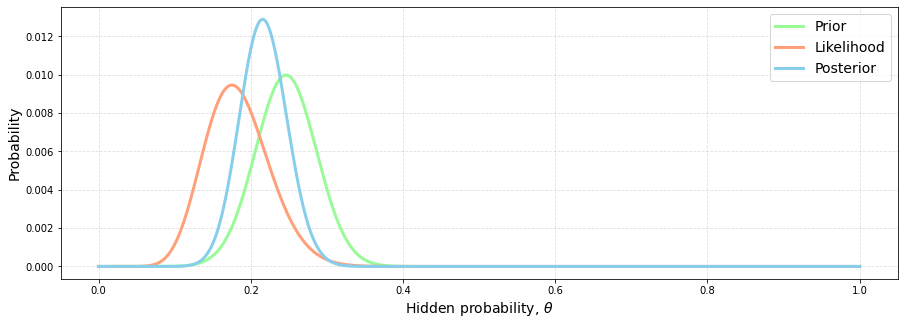


Bayesian inference, round 8
	Empirical probability: 0.16666666666666666
	New estimate, theta = 0.192


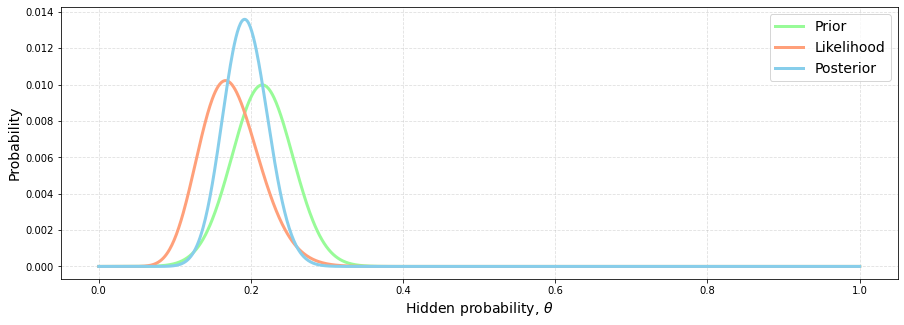

In [21]:
num_rounds = 9
experiments_per_round = 10
hidden_probability = 0.23
theta_range = np.linspace(0, 1, 1000)

mean = 0.5
stddev=0.04
data = np.array([])

prior = get_gaussian_dist(theta_range, mean, stddev)

for rnd in range(num_rounds):
    print(f'Bayesian inference, round {rnd}')
    data = np.append(data, collect_data(experiments_per_round, hidden_probability=hidden_probability))
    print('\tEmpirical probability:', np.sum(data)/len(data))
  
    likelihood = get_binomial_dist(theta_range, data)

    posterior = (likelihood * prior)
    posterior = posterior / np.sum(posterior)

    mean = np.argmax(posterior) / len(posterior)
    print(f'\tNew estimate, theta = {mean}')

    plot_round(theta_range, prior, likelihood, posterior)
    print()

    prior = posterior

# 2-means clustering via Bayesian inference

In [7]:
def gen_gaussian_data(N, dim=2, dist=1, stddev=1.0):
    # generate N random data vectors from two Gaussian clusters
    data = []
    # first cluster is always centered on [0, 0, 0, ...]
    cluster1mean = np.zeros(dim)
    cluster1size = N // 2
    for i in range(cluster1size):
        data.append(np.random.normal(cluster1mean, stddev, (dim)))

    # second cluster is placed along the vector dist*[1, 1, 1, ...]
    cluster2mean = np.zeros(dim) + dist
    for i in range(N-cluster1size):
        data.append(np.random.normal(cluster2mean, stddev, (dim)))
    return np.array(data), cluster1mean, cluster2mean


def plot_data(data):
    fig, ax = plt.subplots(figsize=[4,4])
    ax.scatter(data[:,0], data[:,1])
    ax.axvline(0, ls='--', c='grey')
    ax.axhline(0, ls='--', c='grey')
    plt.show()
    plt.close()

In [8]:
def f(data_point, c1, c2):
    return 

def Z():
    return 

def F(coreset, model):
    cluster1 = [coreset[i] for i in range(len(model)) if model[i] == '0']
    cluster2 = [coreset[i] for i in range(len(model)) if model[i] == '1']
    return 

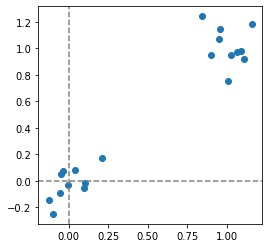

In [9]:
data, true_c1, true_c2 = gen_gaussian_data(N=20, stddev=0.1)
plot_data(data)